In [78]:
import vdms

db = vdms.VDMS()
db.connect("hsw1.jf.intel.com")

In [79]:
image = open("images/sample_brain.jpg")
img_blob = image.read();

In [81]:
query = """
[
   {
      "AddImage" : {
         "properties": {
             "name": "my_favourite_image_2", 
             "id": 39
         },
         "format":"png"
      }
   }
]   
"""
    
blobs = []
blobs.append(img_blob)
    
response, images = db.query(query, [blobs])
vdms.aux_print_json(str(response))

[
    {
        "AddImage": {
            "status": 0
        }
    }
]


[
    {
        "FindImage": {
            "status": 0, 
            "entities": [
                {}, 
                {}
            ], 
            "returned": 2
        }
    }
]


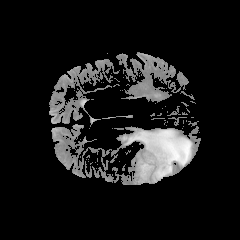

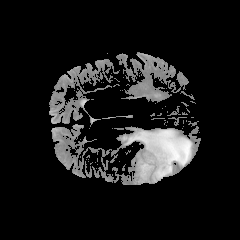

In [82]:
query = """
[
   {
      "FindImage" : {
         "constraints": {
             "id": [">=", 34]
         },
         "operations": [ 
             {
                 "type": "threshold",
                 "value": 128
             }
         ]
      }
   }
]   
"""
    
response, images = db.query(query)
vdms.aux_print_json(str(response))

from IPython.display import Image
counter = 0
for im in images:
    img_file = 'images/res_' + str(counter) + '.jpg'
    counter = counter + 1
    fd = open(img_file, 'w+')
    fd.write(im)
    fd.close()
    display(Image(img_file))